In [1]:
import numpy as np
import parser 
import graph_suite as plot
import material_analytics

In [3]:
data = parser.stress_strain('ref/HSRS/22').get_experimental_data()
plot.plot2D(data)

In [4]:
for point in data:
    print point

[ 0.          0.38665151]
[ 0.00207038  1.53675264]
[ 0.0038187  -0.30353915]
[ 0.00502074 -3.06508516]
[ 0.00673739  4.9886397 ]
[ 0.00829301 -0.30355273]
[ 0.009495    5.67902188]
[ 0.01085796  4.98884527]
[ 0.01260613  4.06834854]
[ 0.01412908  4.29873187]
[ 0.01497645  4.29876829]
[ 0.0158238  -2.37512801]
[ 0.01718668  5.44913029]
[ 0.01742363  2.91758727]
[ 0.01733861  1.53698729]
[ 0.01702841  0.84668592]
[ 0.01684661  0.15638902]
[ 0.01624702  0.38671434]
[ 0.01558322  1.0769984 ]
[ 0.01482264  2.91751139]
[ 0.01335389  1.53692605]
[ 0.01198191  4.29863957]
[ 0.01015951 -0.3035584 ]
[ 0.00801604  0.84660961]
[ 0.00580736  2.22702922]
[ 0.00318079  1.5367697 ]
[  6.90235609e-06  -3.03527578e-01]
[ 0.00403542  3.60711247]
[ 0.00856098  3.14709837]
[ 0.01331199  3.37720703]
[ 0.01812746  5.44720632]
[ 0.0231042  -1.91373233]
[ 0.02820966  1.99673514]
[ 0.03392703  1.76641027]
[ 0.04061022 -0.76379498]
[ 0.04687485  3.60556754]
[ 0.05500686 -0.30336064]
[ 0.06320476  4.98515176]
[ 

In [6]:
model = data
model = material_analytics.log_prep(model,cutoff = 0)
bestfit = material_analytics.log_approx(model)

material_analytics.py:261: RuntimeWarning: divide by zero encountered in log
  return a*np.log(x)+c
/site/x86/anaconda-1.8/anaconda/lib/python2.7/site-packages/scipy/optimize/minpack.py:690: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [11]:
for point in np.linspace(0.1,max(data[:,0]),1001):
    print point, bestfit(point)

0.1 -1.30258509299
0.116583662367 -1.14914613181
0.133167324733 -1.01614886078
0.149750987099 -0.898781450359
0.166334649466 -0.793753559309
0.182918311832 -0.698715609228
0.199501974199 -0.611931146967
0.216085636565 -0.532080484289
0.232669298932 -0.458137151491
0.249252961298 -0.389286989374
0.265836623665 -0.324873355645
0.282420286031 -0.264358941554
0.299003948398 -0.207298500334
0.315587610764 -0.153318946914
0.332171273131 -0.102104560163
0.348754935497 -0.0533857939825
0.365338597864 -0.00693069003443
0.38192226023 0.037461801664
0.398505922597 0.0799670813635
0.415089584963 0.120739085334
0.43167324733 0.159913651147
0.448256909696 0.197611248212
0.464840572063 0.233939212038
0.481424234429 0.268993586665
0.498007896796 0.302860654937
0.514591559162 0.335618218015
0.531175221529 0.367336671874
0.547758883895 0.398079918249
0.564342546262 0.427906139681
0.580926208628 0.45686846228
0.597509870995 0.485015525181
0.614093533361 0.512391972028
0.630677195728 0.539038876951
0.6472

In [36]:
data = parser.stress_strain('ref/HSRS/222').get_experimental_data()

data = material_analytics.log_prep(data,cutoff = 0.1)
bestfit = material_analytics.log_approx(data)
domain = np.linspace(0.1,max(data[:,0]),1001)

vals = material_analytics.combine_data(domain,bestfit(domain))

#plot.plotmult2D(vals,data)
deriv1st = material_analytics.get_slopes(material_analytics.combine_data(domain,bestfit(domain)))
deriv2nd = material_analytics.get_slopes(material_analytics.combine_data(domain[:-1],deriv1st))
deriv3rd = material_analytics.get_slopes(material_analytics.combine_data(domain[:-2],deriv2nd))

#def find_nearest(array,value):
#    idx = (np.abs(array-value)).argmin()
#    return array[idx]

find_nearest = lambda array,value: array[(np.abs(array-value)).argmin()]
ave_slope = (vals[-1,1]-vals[0,1])/(vals[-1,0]-vals[0,0])
index_ave = np.where(deriv1st == find_nearest(deriv1st, ave_slope))
log_bend = vals[index_ave][0]
young_mod = (log_bend[1]-vals[0,1])/(log_bend[0]-vals[0,0])

print young_mod



15.2120856192


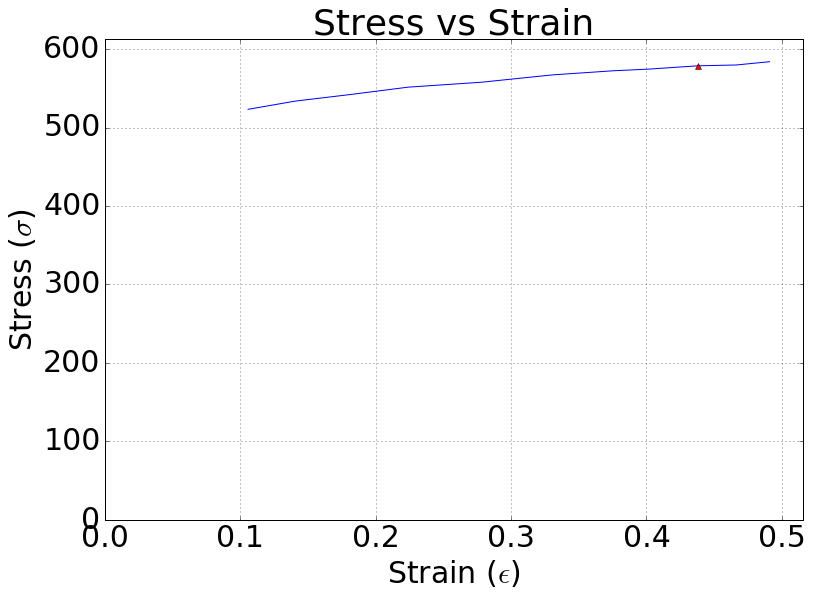

In [139]:
%matplotlib inline
data = parser.stress_strain('ref/850-30.dat').get_experimental_data()

data = material_analytics.log_prep(data,cutoff = 0.1)
bestfit = material_analytics.log_approx(data)
domain = np.linspace(0.1,max(data[:,0]),1001)

vals = material_analytics.combine_data(domain,bestfit(domain))

deriv1st = material_analytics.get_slopes(material_analytics.combine_data(domain,bestfit(domain)))

find_nearest = lambda array,value: array[(np.abs(array-value)).argmin()]

ave_slope = (vals[-1,1]-vals[0,1])/(vals[-1,0]-vals[0,0])
index_ave = np.where(deriv1st == find_nearest(deriv1st, ave_slope))
log_bend = vals[index_ave][0]
young_mod = (log_bend[1]-vals[0,1])/(log_bend[0]-vals[0,0])

linear_mod_0 = lambda x: young_mod*(x) + vals[0,1] # we will find where this intersects our exp data
linear_mod_2 = lambda x: young_mod*(x-0.2) + vals[0,1] # we will find where this intersects our exp data

samples0 = material_analytics.samplepoints(linear_mod_0,[0.1,max(vals[:,0])],1001)
samples2 = material_analytics.samplepoints(linear_mod_2,[0.1,max(vals[:,0])],1001)

#plot.plotmult2D(vals,samples2)
diff = np.abs(samples2[:,1] - vals[:,1])

#for index in xrange(len(vals)):
#    print samples2[index], vals[index], diff[index]

"""We can call this the intersection, its the closest point"""
leastindex = diff.argmin()

cross_est = vals[leastindex].reshape(1,-1)[0,1]

#print cross_est

yieldstress = find_nearest(data[:,1].reshape(-1,1),cross_est)[0]
#print yieldstress

yieldpt = data[np.where(data[:,1] == yieldstress)]
#print yieldpt
plot.plotmult2D(data,yieldpt, title = 'Stress vs Strain', xtitle = 'Strain ($\epsilon$)', ytitle= 'Stress ($\sigma$)')